Web scrape code

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

In [4]:
import requests
from bs4 import BeautifulSoup
import re

In [5]:
html_page = requests.get ('https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_One_video_games')
soup = BeautifulSoup (html_page.text, 'html.parser')
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of best-selling Xbox One video games - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b9002ed1-fb0f-456b-94a5-eca7041bff74","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_best-selling_Xbox_One_video_games","wgTitle":"List of best-selling Xbox One video games","wgCurRevisionId":989297675,"wgRevisionId":989297675,"wgArticleId":41742359,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description i

In [16]:
# print (soup.find_all('p'))

[<p>Sorry but something about this request looked a bit suspicious, and we block suspicious stuff.</p>]


In [1]:
# I did have to install wikipedia on my computer
# Here is a link that helps if you don't have it already
# https://wikipedia.readthedocs.io/en/latest/quickstart.html
import wikipedia

In [8]:
table = soup.find ('table', class_="wikitable plainrowheaders sortable")
# <th scope="row" style="text-align:center;">1
print (table)

<table class="wikitable plainrowheaders sortable" style="font-size:85%;">
<tbody><tr>
<th scope="col"><abbr title="Number">No.</abbr>
</th>
<th scope="col" style="width:20%;">Game
</th>
<th scope="col" style="width:15%;">Copies sold
</th>
<th scope="col" style="width:20%;">Release date<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[a]</a></sup>
</th>
<th scope="col" style="width:15%;">Genre(s)
</th>
<th scope="col" style="width:15%;">Developer(s)
</th>
<th scope="col" style="width:15%;">Publisher(s)
</th></tr>
<tr>
<th scope="row" style="text-align:center;">1
</th>
<td><i><a href="/wiki/Grand_Theft_Auto_V" title="Grand Theft Auto V">Grand Theft Auto V</a></i>
</td>
<td><span data-sort-value="7000872000000000000♠">8.72</span><span class="nowrap"> </span>million<sup class="reference" id="cite_ref-Statista_all_time_2-0"><a href="#cite_note-Statista_all_time-2">[1]</a></sup>
</td>
<td><span data-sort-value="000000002014-11-18-0000" style="white-space:nowrap">November 18, 201

In [12]:
info = table.findAll ('td')
info[0].find('a')

<a href="/wiki/Grand_Theft_Auto_V" title="Grand Theft Auto V">Grand Theft Auto V</a>

In [21]:
info[0].find('a').attrs['title']

'Grand Theft Auto V'

In [20]:
# game_titles = [td.find('a').attrs['title'] for td in table.findAll('td')]
# game_titles[:5]

#  that didn't work... let's try something else

In [27]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_One_video_games')

In [28]:
len (df)

7

In [38]:
top_xbox_games_df = df[2]

In [42]:
top_xbox_games_df.info()
top_xbox_games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No.              32 non-null     int64 
 1   Game             32 non-null     object
 2   Copies sold      32 non-null     object
 3   Release date[a]  32 non-null     object
 4   Genre(s)         32 non-null     object
 5   Developer(s)     32 non-null     object
 6   Publisher(s)     32 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.9+ KB


,No.,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,1,Grand Theft Auto V,8.72 million[1],"November 18, 2014",Action-adventure,Rockstar North,Rockstar Games
1,2,PlayerUnknown's Battlegrounds,8 million[2],"September 4, 2018",Battle Royale,PUBG Corporation,Microsoft Studios
2,3,Call of Duty: Black Ops III,7.37 million[1],"November 6, 2015",First-person shooter,Treyarch,Activision
3,4,Call of Duty: WWII,6.23 million[1],"November 3, 2017",First-person shooter,Sledgehammer Games,Activision
4,5,Red Dead Redemption 2,5.77 million[1],"October 26, 2018",Action-adventure,Rockstar Studios,Rockstar Games


In [79]:
top_xbox_games_df.rename(columns= {'Genre(s)' : 'Genre', 'Copies sold': 'Copies_sold', \
                                   'Release date[a]': 'Release_date', 'Developer(s)': 'Developer', \
                                  'Publisher(s)': 'Publisher', 'No.': 'Rank'}, inplace= True)

In [103]:
top_xbox_games_df['is_Microsoft'] = ["Yes" if i=="Microsoft Studios" else "No" for i in top_xbox_games_df["Publisher"]]


In [104]:
top_xbox_games_df.head()

,Rank,Game,Copies_sold,Release_date,Genre,Developer,Publisher,is_Microsoft
0,1,Grand Theft Auto V,8.72 million[1],"November 18, 2014",Action-adventure,Rockstar North,Rockstar Games,No
1,2,PlayerUnknown's Battlegrounds,8 million[2],"September 4, 2018",Battle Royale,PUBG Corporation,Microsoft Studios,Yes
2,3,Call of Duty: Black Ops III,7.37 million[1],"November 6, 2015",First-person shooter,Treyarch,Activision,No
3,4,Call of Duty: WWII,6.23 million[1],"November 3, 2017",First-person shooter,Sledgehammer Games,Activision,No
4,5,Red Dead Redemption 2,5.77 million[1],"October 26, 2018",Action-adventure,Rockstar Studios,Rockstar Games,No


In [ ]:
# sns.scatterplot

In [80]:
org_publisher_df = top_xbox_games_df.sort_values (by= 'Publisher')

In [81]:
org_publisher_df.reset_index(inplace= True, drop= True)

<AxesSubplot:xlabel='count', ylabel='Publisher'>

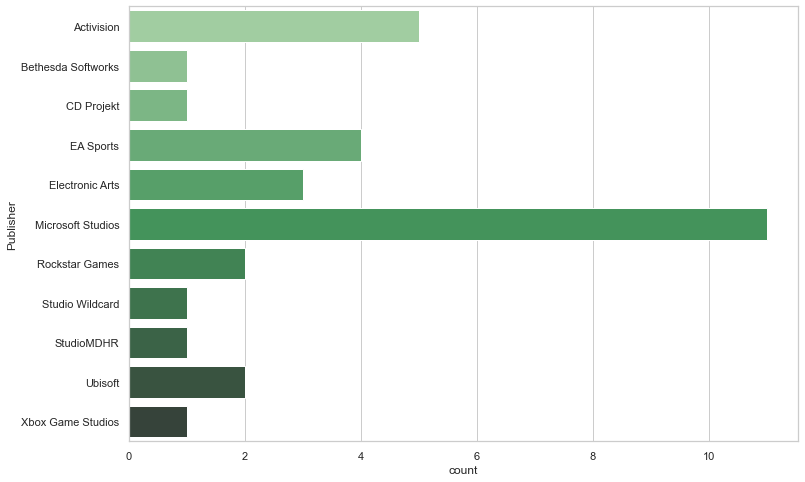

In [82]:
plt.figure (figsize= (12, 8))
sns.countplot (y= 'Publisher', data= org_publisher_df, palette= 'Greens_d')

,Rank,Game,Copies_sold,Release_date,Genre,Developer,Publisher,is_Microsoft
0,19,Destiny,3.41 million[5],"September 9, 2014",First-person shooter,Bungie,Activision,no
1,3,Call of Duty: Black Ops III,7.37 million[1],"November 6, 2015",First-person shooter,Treyarch,Activision,yes
2,4,Call of Duty: WWII,6.23 million[1],"November 3, 2017",First-person shooter,Sledgehammer Games,Activision,no
3,7,Call of Duty: Advanced Warfare,5.22 million[1],"November 4, 2014",First-person shooter,Sledgehammer Games,Activision,no
4,11,Call of Duty: Infinite Warfare,4.79 million[1],"November 4, 2016",First-person shooter,Infinity Ward,Activision,no


In [105]:
# org_publisher_df

In [85]:
micro_only_df = org_publisher_df[14:25]

In [93]:
micro_only_df.reset_index (inplace= True, drop=True)

In [94]:
micro_only_df.sort_values(by= 'Rank')

,Rank,Game,Copies_sold,Release_date,Genre,Developer,Publisher
0,2,PlayerUnknown's Battlegrounds,8 million[2],"September 4, 2018",Battle Royale,PUBG Corporation,Microsoft Studios
1,6,Minecraft: Xbox One Edition,5.43 million[1],"September 5, 2014",Sandboxsurvival,4J Studios,Microsoft Studios
2,10,Halo 5: Guardians,5 million[3],"October 27, 2015",First-person shooter,343 Industries,Microsoft Studios
3,14,Forza Horizon 3,3.91 million[5],"September 27, 2016",Racing,Playground Games,Microsoft Studios
4,16,Gears of War: Ultimate Edition,3.61 million[5],"August 25, 2015",Third-person shooter,The Coalition,Microsoft Studios
5,20,Gears of War 4,3.37 million[5],"October 11, 2016",Third-person shooter,The Coalition,Microsoft Studios
6,25,Dead Rising 3,2.6 million[7],"November 22, 2013",Action-adventuresurvival horror,Capcom Vancouver,Microsoft Studios
7,28,Forza Motorsport 5,2 million[8],"November 22, 2013",Racing,Turn 10 Studios,Microsoft Studios
8,30,Sunset Overdrive,~1.16 million[10] (estimated),"October 28, 2014",Action-adventurethird-person shooter,Insomniac Games,Microsoft Studios
9,31,Rise of the Tomb Raider,1 million[11],"November 10, 2015",Action-adventure,Crystal Dynamics,Microsoft Studios


In [111]:
# def convert_to_int(df, col):
#     df[col] = df[col].str.replace('$','').str.replace(',', '').astype('int')
#     return df

# cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

# for col in cols_to_convert:
#     movie_budgets_df = convert_to_int(movie_budgets_df, col)
    
print(micro_only_df['Copies_sold'][0].rstrip(' million [2]'))

print(micro_only_df['Copies_sold'][1].str.replace(' million', ''))


8 


AttributeError: 'str' object has no attribute 'str'